In [32]:
#Important libraries for visualising data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [33]:
#Changing the working directory
import os
os.chdir('C:\\Users\\Alpesh\\OneDrive\\Documents\\Projects\\Fetal Health')

In [3]:
#loading the data 
data = pd.read_csv('fetal_health.csv')

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


<AxesSubplot:xlabel='baseline value', ylabel='Count'>

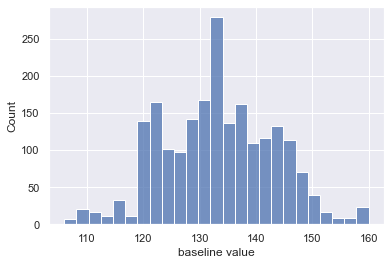

In [6]:
#Variation of FHR(Baseline value) - Fetal Health Rate over 2126 data entries
sns.set_theme(style='darkgrid')
sns.histplot(data['baseline value'])

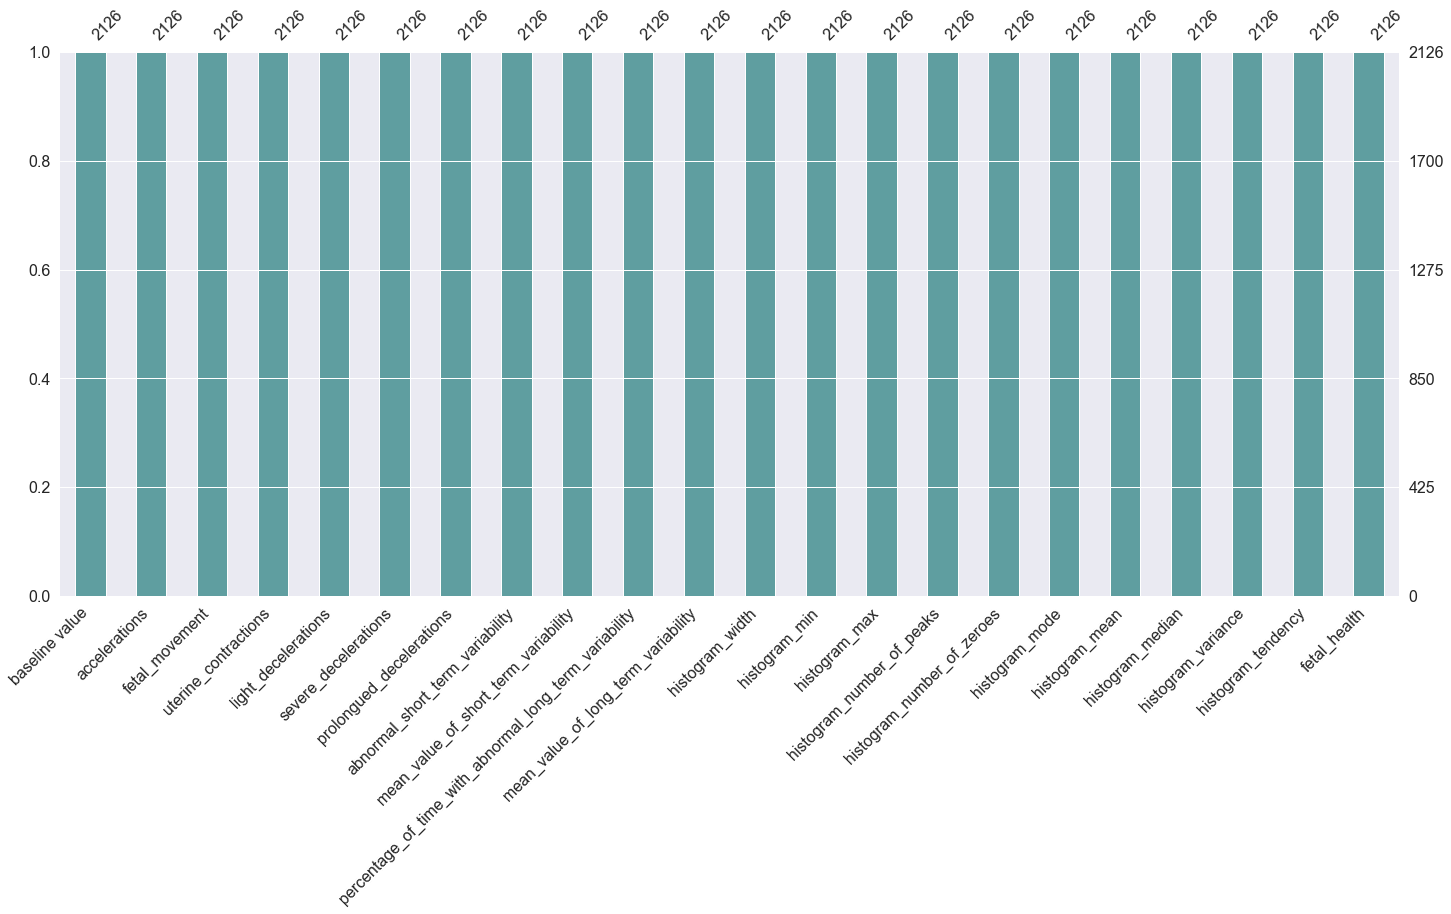

In [24]:
#To check the whether there are any null values in our data
null_plot = msno.bar(data, color = "#5F9EA0")

Text(0, 0.5, 'Cases')

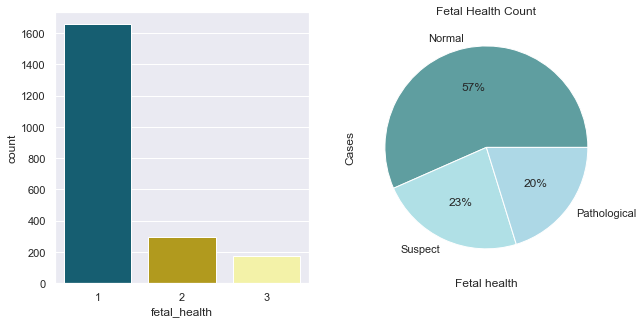

In [30]:
#Pie chart and bar graph for division of entries with fetal health 1, 2 & 3
plt.figure(figsize=(10,5))

#Bar Graph
plt.subplot(121)
colours = ['#076780', '#caab05', '#fffe9c']
sns.set_theme(style="darkgrid")
sns.countplot(data=data,x="fetal_health", palette= colours)


total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

#Pie chart
plt.subplot(122)
vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal Health Count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")

### Correlation Matrix of 21 independent variables with 1 target variable

<AxesSubplot:>

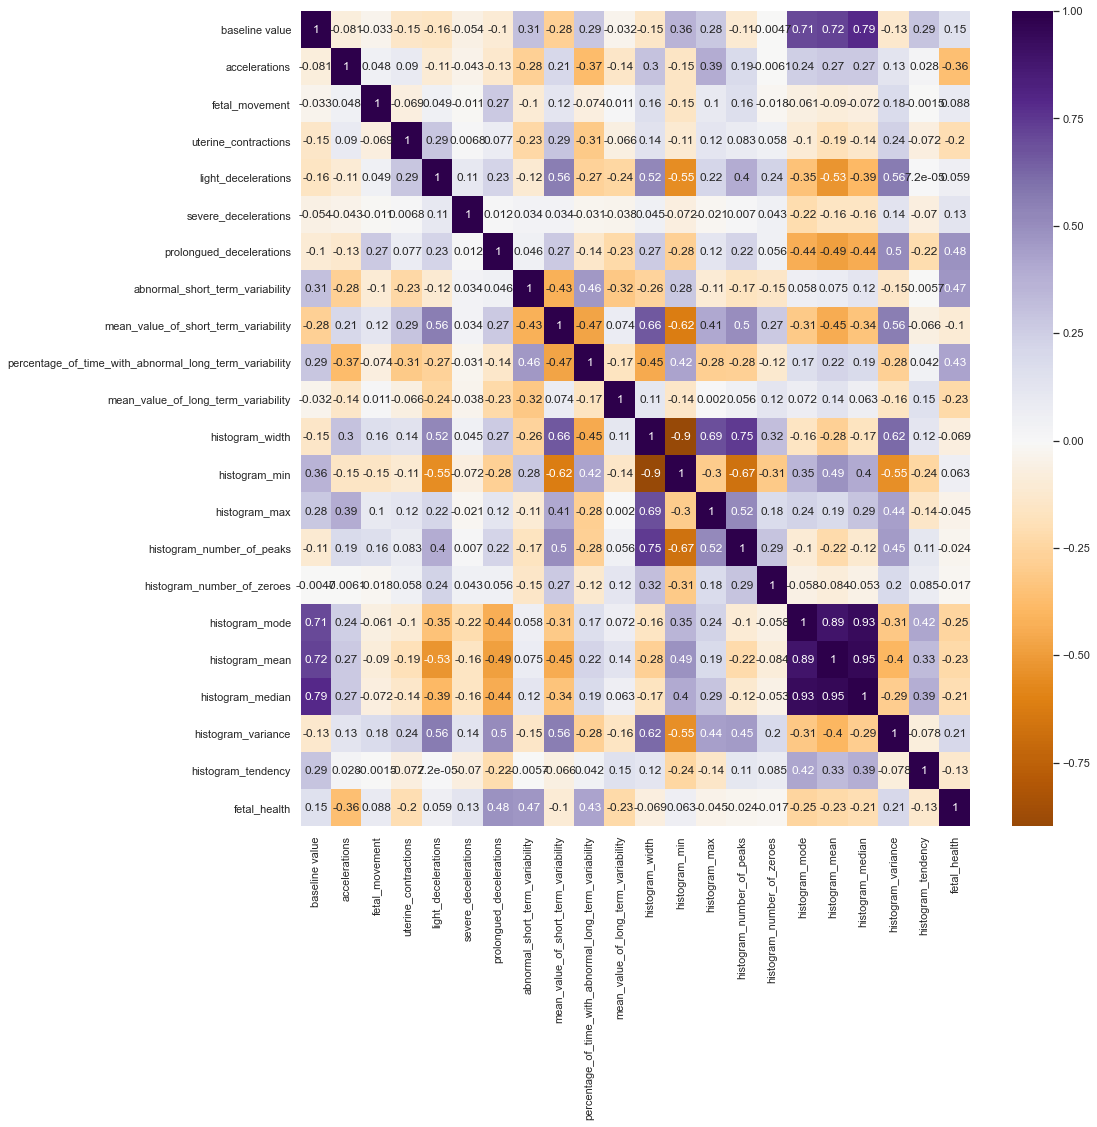

In [31]:
#Correlation of all the variables with fetal health 
correlation_matrix = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='PuOr', center=0)

In [8]:
#Top 10 variables with the highest correlation with fetal_health
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

correlation_numeric = numeric_corr['fetal_health'].sort_values(ascending=False).head(10).to_frame()

numeric_table = correlation_numeric.style.background_gradient(cmap='GnBu')
numeric_table

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


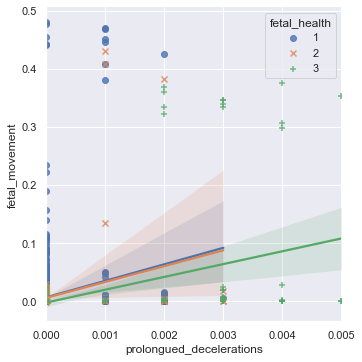

In [14]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False,markers=["o","x","+"])

### Depiction of Outliers 

C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


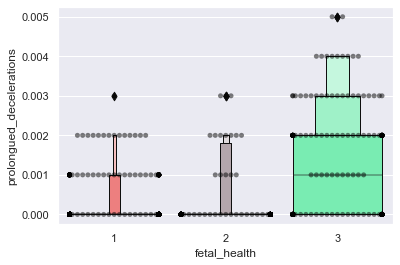

C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


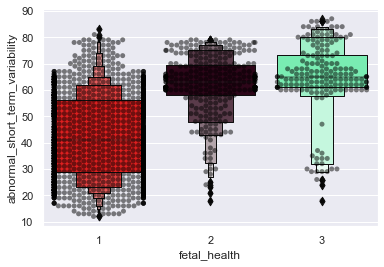

C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alpesh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


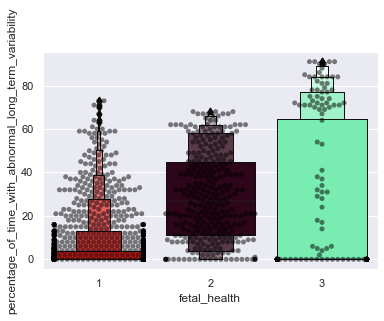

In [19]:
#Outliers in the top 3 correlated variables with fetal health
cols=['prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability']
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()